* Logistic regression is a Machine Learning algorithm (predicitve analytics technique) used in binary           classification problem

* The dependent variable are **categorical** in nature, here the dependent variable is also reffered to as       **target variable** and independent variable are called as predictors.

* Logistics regression is a special case of regression where only we predict the outcome in categorical         variable

* We use the sigmoid curve / function to predict the categorical value.

* The threshold value decides the outcome.



<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png" width="500" height="500">


1 / (1 + e^-value)

Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.

Below is an example logistic regression equation:

y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))

Where y is the predicted output, b0 is the bias or intercept term and b1 is the coefficient for the single input value (x). Each column in your input data has an associated b coefficient (a constant real value) that must be learned from your training data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',color_codes=True)

In [2]:
df = pd.read_csv('banking.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [5]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [6]:
df['education'] = np.where(df['education']=='basic.4y','Basic',df['education'])

In [7]:
df['education'] = np.where(df['education']=='basic.6y','Basic',df['education'])

In [8]:
df['education'] = np.where(df['education']=='basic.9y','Basic',df['education'])

In [9]:
df['education'] = np.where(df['education']=='university.degree','University Degree',df['education'])

In [10]:
df['education'] = np.where(df['education']=='high.school','High School',df['education'])

In [11]:
df['education'] = np.where(df['education']=='professional.course','Professional Course',df['education'])

In [12]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [13]:
df['job'] = np.where(df['job']=='admin.','admin',df['job'])

In [14]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [15]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

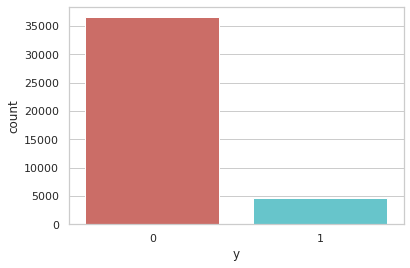

In [16]:
sns.countplot(x='y',data=df,palette='hls')
plt.show()

In [17]:
count_no = len(df[df['y'] == 0])

In [18]:
count_no

36548

In [19]:
count_yes = len(df[df['y'] == 1])

In [20]:
count_yes

4640

In [21]:
yes_percentage = count_yes/(count_yes+count_no)

In [22]:
yes_percentage = yes_percentage*100

In [23]:
yes_percentage

11.265417111780131

In [24]:
no_percentage = count_no / (count_yes+count_no)

In [25]:
no_percentage = no_percentage * 100

In [26]:
no_percentage

88.73458288821988

In [27]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


* Average age of customers who bought the offer is higher than that of the customers who did not .

* p days (days since the customer was last contacted) is lower for the customers who took the offer, as         compared to those who didn't

* campagins are lower for the ones who took the offer as compared to the ones who did not

In [28]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [29]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [30]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
High School,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
Professional Course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
University Degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [31]:
pd.crosstab(df.job,df.y)

y,0,1
job,,
admin,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


<Figure size 1440x1296 with 0 Axes>

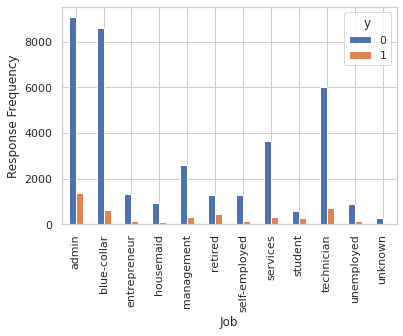

In [32]:
plt.figure(figsize=(20,18))
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.xlabel('Job')
plt.ylabel('Response Frequency')
plt.show()

<Figure size 1440x1296 with 0 Axes>

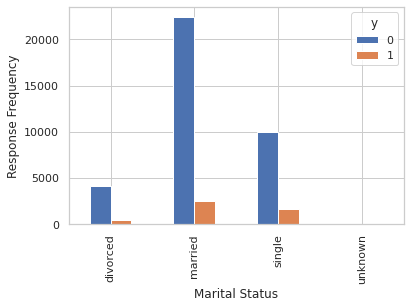

In [33]:
plt.figure(figsize=(20,18))
pd.crosstab(df.marital,df.y).plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Response Frequency')
plt.show()

<Figure size 1440x1296 with 0 Axes>

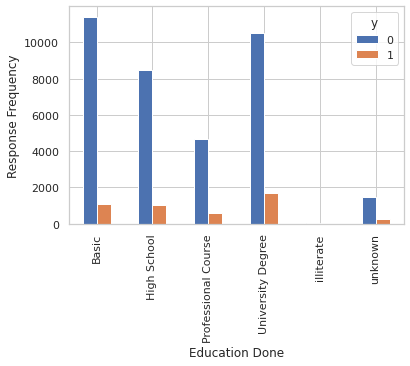

In [34]:
plt.figure(figsize=(20,18))
pd.crosstab(df.education,df.y).plot(kind='bar')
plt.xlabel('Education Done')
plt.ylabel('Response Frequency')
plt.show()

<Figure size 1440x1296 with 0 Axes>

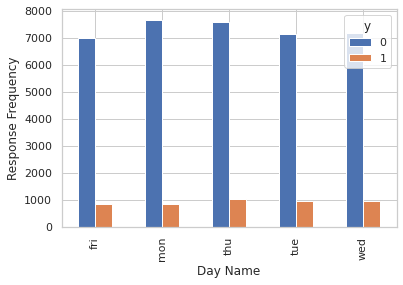

In [35]:
plt.figure(figsize=(20,18))
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.xlabel('Day Name')
plt.ylabel('Response Frequency')
plt.show()

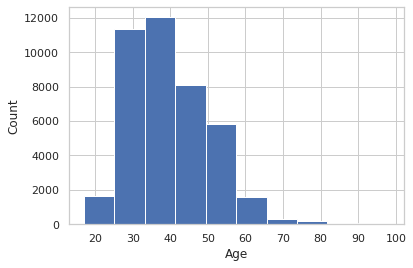

In [36]:
plt.hist(x=df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [37]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [38]:
pd.crosstab(df['poutcome'],df['y'])

y,0,1
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


In [39]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,University Degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,High School,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [40]:
cat_var = [
    'job','marital','education','default','housing','loan',
    'contact','month','day_of_week','poutcome'
]

In [54]:
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [52]:
for var in cat_var:
    cat_list = 'var'+var
    cat_list = pd.get_dummies(df[var],prefix=var)
    df1 = df.join(cat_list)
    df = df1

SyntaxError: unmatched ')' (778499872.py, line 2)

In [44]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,University Degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,High School,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,High School,unknown,no,yes,telephone,jun,thu,...,0,0,0,0,1,0,0,0,1,0
41184,31,housemaid,married,Basic,unknown,no,no,telephone,may,thu,...,0,0,0,0,1,0,0,0,1,0
41185,42,admin,single,University Degree,unknown,yes,yes,telephone,may,wed,...,0,0,0,0,0,0,1,0,1,0
41186,48,technician,married,Professional Course,no,no,yes,telephone,oct,tue,...,1,0,0,0,0,1,0,0,1,0


In [47]:
df.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Professional Course',
 'education_University Degree',
 'education_illiterate',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_

In [48]:
data_var = df.columns.values.tolist()

to_keep = [i for i in data_var if i not in cat_var]

In [51]:
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Professional Course',
 'education_University Degree',
 'education_illiterate',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_w

In [55]:
final_df = df[to_keep]

In [56]:
final_df

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [57]:
final_df.dtypes

age                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
                        ...  
day_of_week_tue         uint8
day_of_week_wed         uint8
poutcome_failure        uint8
poutcome_nonexistent    uint8
poutcome_success        uint8
Length: 62, dtype: object

In [58]:
final_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Professional Course', 'education_University Degree',
       'education_illiterate', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       

In [59]:
y = final_df['y']

In [60]:
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [61]:
cols = ['euribor3m','job_blue-collar','marital_unknown','default_no','contact_cellular',
        'month_apr','month_aug','month_dec','month_jul','month_mar','month_oct','poutcome_failure','poutcome_success']

In [62]:
cols

['euribor3m',
 'job_blue-collar',
 'marital_unknown',
 'default_no',
 'contact_cellular',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_mar',
 'month_oct',
 'poutcome_failure',
 'poutcome_success']

In [63]:
x = final_df[cols]

In [64]:
x

,euribor3m,job_blue-collar,marital_unknown,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_mar,month_oct,poutcome_failure,poutcome_success
0,4.963,1,0,0,1,0,1,0,0,0,0,0,0
1,4.021,0,0,1,1,0,0,0,0,0,0,0,0
2,0.729,0,0,1,1,0,0,0,0,0,0,0,1
3,1.405,0,0,1,1,1,0,0,0,0,0,0,0
4,0.869,0,0,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4.866,0,0,0,0,0,0,0,0,0,0,0,0
41184,4.860,0,0,0,0,0,0,0,0,0,0,0,0
41185,4.857,0,0,0,0,0,0,0,0,0,0,0,0
41186,0.742,0,0,1,0,0,0,0,0,0,1,0,0


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [67]:
X_train

,euribor3m,job_blue-collar,marital_unknown,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_mar,month_oct,poutcome_failure,poutcome_success
2391,0.849,0,0,1,1,0,1,0,0,0,0,1,0
35173,1.354,0,0,1,1,0,0,0,0,0,0,1,0
33135,4.962,1,0,1,1,0,0,0,1,0,0,0,0
33318,1.291,0,0,1,1,0,0,0,0,0,0,0,0
14920,1.334,1,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35227,0.886,0,0,1,1,0,0,0,0,0,0,1,0
20163,4.859,0,0,1,0,0,0,0,0,0,0,0,0
26825,4.963,0,0,1,1,0,1,0,0,0,0,0,0
8698,4.960,0,0,1,1,0,0,0,1,0,0,0,0


In [68]:
X_test

,euribor3m,job_blue-collar,marital_unknown,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_mar,month_oct,poutcome_failure,poutcome_success
16411,4.962,0,0,1,1,0,1,0,0,0,0,0,0
17583,4.963,0,0,0,1,0,1,0,0,0,0,0,0
9545,4.966,0,0,0,1,0,1,0,0,0,0,0,0
32113,4.962,1,0,0,0,0,0,0,0,0,0,0,0
36760,1.244,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,4.963,1,0,1,1,0,0,0,1,0,0,0,0
26279,4.120,1,0,1,1,0,0,0,0,0,0,0,0
15027,4.076,1,0,0,1,0,0,0,0,0,0,0,0
25768,4.961,1,0,1,0,0,0,0,0,0,0,0,0


In [69]:
y_train

2391     0
35173    0
33135    0
33318    0
14920    0
        ..
35227    0
20163    0
26825    0
8698     0
32282    0
Name: y, Length: 28831, dtype: int64

In [70]:
y_test

16411    0
17583    0
9545     0
32113    0
36760    0
        ..
6127     0
26279    0
15027    0
25768    0
39709    0
Name: y, Length: 12357, dtype: int64

In [71]:
log_reg = LogisticRegression(max_iter=1000)

In [72]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [73]:
y_pred = log_reg.predict(X_test)

In [74]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [75]:
for item in y_pred:
    print(item)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [76]:
print('Accuracy score is ',log_reg.score(X_test,y_test))

Accuracy score is  0.9000566480537348


In [78]:
from sklearn.metrics import confusion_matrix

In [80]:
print(confusion_matrix(y_test,y_pred))

[[10847   139]
 [ 1096   275]]
